# Bandit Class

In [23]:
import numpy as np

class Bandit:
    
    """
    
    Class to represent a slot machine with a secret probability of reward
    """
    
    def __init__(self):
        self.__probability = np.random.uniform()
        
    def __repr__(self):
        return "this is a bandit object with secret probability "  + str(self.__probability)
    
    def pull(self):
        
        """
        
        returns true representing a reward or false representing no reward
        """
        
        return np.random.choice((True, False), p=[self.__probability, 1-self.__probability])

In [24]:
b5 = Bandit()
b5

this is a bandit object with secret probability 0.4403993829596672

In [25]:
b5.pull()

False

---

In [22]:
[b5.pull() for i in range(20)]

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [23]:
results = [b5.pull() for i in range(20)]

In [24]:
results

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [25]:
sum(results)

1

In [26]:
# win ration

In [27]:
sum(results)/ len(results)

0.05

    i.e 5% change of winning at this

---

---

# Solver Class

In [55]:
class RandomSolver:
    
    """
    represents a player in a multi-armed bandit problem
    the algorithm is to choose a bandit completely at random
    
    """
    
    def __init__(self, bandits):
        # at the smae time we crate the solver, we tell the solver where the bandits are
        
        self.bandits = bandits
    
    def move(self):
        
        """
        
        makes this solver choose a bandit and call pull on it. Returns true is reward is given
        """
        
        
        # attriute that is also a method
        
        # needs to choose one of these bandits and pull the lever
        # this is where the strategy goes
        
        # choose at random (use any of the random methods in np)
        
        chosen = np.random.randint(0, len(bandits))
        print("Choosing bandit number", chosen)
        
        # to gt the actual bandit object
        
        return bandits[chosen].pull()
        # returns true or false

In [27]:
# list of bandits

bandits = [Bandit() for i in range(10)]
bandits

[this is a bandit object with secret probability 0.8919639484434378,
 this is a bandit object with secret probability 0.2236221289688567,
 this is a bandit object with secret probability 0.9367486111564436,
 this is a bandit object with secret probability 0.3387093526747452,
 this is a bandit object with secret probability 0.06340931863747035,
 this is a bandit object with secret probability 0.4784089983532357,
 this is a bandit object with secret probability 0.3926264812429553,
 this is a bandit object with secret probability 0.6079156135235504,
 this is a bandit object with secret probability 0.5266328260710693,
 this is a bandit object with secret probability 0.7231403676576295]

---

---

In [8]:
solver = RandomSolver(bandits)

In [28]:
sum( [ solver.move() for i in range(10)])

Choosing bandit number 0
Choosing bandit number 6
Choosing bandit number 1
Choosing bandit number 2
Choosing bandit number 4
Choosing bandit number 2
Choosing bandit number 6
Choosing bandit number 5
Choosing bandit number 2
Choosing bandit number 1


3

In [39]:
# this gives us 5 rewards out of 10 tries

---

# Solver Class (repeat for ease)

In [56]:
class RandomSolver:
    
    """
    represents a player in a multi-armed bandit problem
    the algorithm is to choose a bandit completely at random
    
    """
    
    def __init__(self, bandits):
        # at the smae time we crate the solver, we tell the solver where the bandits are
        
        self.bandits = bandits
    
    def move(self):
        
        """
        
        makes this solver choose a bandit and call pull on it. Returns true is reward is given
        """
        
        
        # attriute that is also a method
        
        # needs to choose one of these bandits and pull the lever
        # this is where the strategy goes
        
        # choose at random (use any of the random methods in np)
        
        chosen = np.random.randint(0, len(bandits))
        print("Choosing bandit number", chosen)
        
        # to gt the actual bandit object
        
        return bandits[chosen].pull()
        # returns true or false

# Game Class

In [16]:
## remaining functionality

# 1. Keeping Score

# 2. Making Graphs /Charts

# 3. Enforce the Rules (so far, it is entirely dependent on teh solver -- person)

In [52]:
class Game:
    
    """
    This is a class to represent the overall rules of the game
    """
    
    def __init__(self, num_moves):
        
        self.num_moves = num_moves # store as an instance attr
        
        self.score = 0
        
        self.history = []
        
    def moves_remaining(self):
        
        # this is a boolean method to return true or false
        
        return self.num_moves > len(self.history)

---

# Bandit Class (Refactored)

In [53]:
import numpy as np

class Bandit:
    
    """
    
    Class to represent a slot machine with a secret probability of reward
    """
    
    def __init__(self, game):
        self.__probability = np.random.uniform()
        
        #----------------- Addition ------------------------------------------------
        self.game = game
        #-------------------------------------------------------------------------------

        
        
    def __repr__(self):
        return "this is a bandit object with secret probability "  + str(self.__probability)
    
    def pull(self):
        
        """
        
        returns true representing a reward or false representing no reward
        """
        
        #----------------- Addition ------------------------------------------------
        
        # Addition:  is the solver following the rules (ie if there are moves remaining)
        
        if not self.game.moves_remaining():
            raise Exception ("Bandit pull called with no moves remaining")
        
        #------------------ Addition ---------------------------------------------------

        #return np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        result = np.random.choice((True, False), p=[self.__probability, 1-self.__probability])
        
        self.game.history.append(result)
        
        self.game.score += result
        
        return result # not to break previous functinality
    
        #-------------------------------------------------------------------------------

    

---

---

In [58]:
game = Game(2)

In [59]:
bandits = [Bandit(game) for i in range(10)]

In [60]:
s = RandomSolver(bandits)

In [61]:
game.history

[]

In [62]:
s.move()

Choosing bandit number 1


True

In [64]:
s.move()

Choosing bandit number 9


False

In [65]:
game.history

[True, False]

In [66]:
game.score

1

In [68]:
s.move()

Choosing bandit number 0


Exception: Bandit pull called with no moves remaining

This is correct
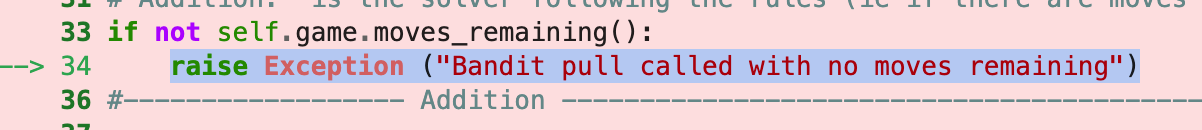